In [5]:
#pip install pandas

In [6]:
#pip install numpy

In [7]:
#pip install matplotlib

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)
pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 500)

In [9]:
DataFrame = pd.read_csv("Bengaluru_House_Data.csv")
DataFrame.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
DataFrame.shape

(13320, 9)

In [12]:
#check the number of values in each category of area_type.
DataFrame.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [14]:
#Now let's assume area_type, availablity, society, balcony not matter as such on price so we simply deop and prepare or dataset
DataFrame2 = DataFrame.drop(['area_type','society','balcony', 'availability'], axis='columns')

In [15]:
#Now we have all required features into dataframe
DataFrame2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
#--------------Data Cleaning-------------------

In [17]:
#Handling missing values

In [18]:
DataFrame2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [19]:
#As here NA values rows are less as compare to number of rows. 
#We can drop those rows
DataFrame3 = DataFrame2.dropna()
DataFrame3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
#As we check the size column have different units for magnitude, so need to correct them
DataFrame3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
#correct this mistake we, prepare one extra col. BHK which having magnitude with BHK asa single understandable unit.

DataFrame3['bhk'] = DataFrame3['size'].apply(lambda x: int(x.split(' ')[0]))



/Users/ganesh_dhasade/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
DataFrame3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [25]:
DataFrame3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [26]:
#Now move to next col. Total_Sqft and check is there any formate needed
DataFrame3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
#As we see there are some values which contain range. Which is not acceptable
#Need to formate or handle such data
#First i try to convert this range values into float by using UDF is_float()
#We create one function to convert col. values into float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True




In [32]:
#Now we have function which conver col values into float
#We convert all or check the values in toal_sqft rows are in float or not 
#And try to get all range values
DataFrame3[~DataFrame3['total_sqft'].apply(is_float)].head(20)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [37]:
#Now to handle this uniformalites
#What we do when we have range like 2100-2850 we try to take average and 
# take value as total_Sqf
#Also for values like 34.46Sq. Meter we simply ignore ore we remove the unit
#Now we create function to take input string split the token number and take average

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        


In [38]:
#Check the function
convert_sqft_to_num('2100-2850')

2475.0

In [40]:
#Create new dataframe on this dataframe we perfome this transformation 
DataFrame4 = DataFrame3.copy()
DataFrame4['total_sqft'] = DataFrame4['total_sqft'].apply(convert_sqft_to_num)
DataFrame4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [43]:
#Check the data for location for which we check the function and its look good
DataFrame4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [44]:
#----------Data Feature Engineering------------

In [46]:
DataFrame5 = DataFrame4.copy()

In [47]:
#Now we check the price which is mention make sense with price/sqft
#For that we create new col.
DataFrame5['price_pre_sqft'] = DataFrame5['price']*100000/DataFrame5['total_sqft']
DataFrame5.head()


,location,size,total_sqft,bath,price,bhk,price_pre_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [49]:
#Now check location and how many categories are there
len(DataFrame5.location.unique())

1304

In [56]:
#Usually for categorical data we usually use create dummies but here dummies are not helpful
#As we have 1304 categories which is huge
#Hence this called dimensionality cruse.
#There are various methods to solve this
#1st we try to check the data is correct by strip it

DataFrame5.location =  DataFrame5.location.apply(lambda x: x.strip())
location_stats = DataFrame5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats




location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [57]:
#So as we see there are many columns having less data points,
#So we can put on threshold of 10 datapoints and add them into other location category
#Check number of datapoints having less than 10 datapoints
len(location_stats[location_stats<=10])


1052

In [58]:
#Now we create one vairable and add those all datapoints into that variable
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10




location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [59]:
len(DataFrame5.location.unique())

1293

In [60]:
#Now we replace all locations available in location_Stats_less_than_10 to other 
DataFrame5.location = DataFrame5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(DataFrame5.location.unique())



242

In [63]:
#As we reduce 1293 categories into 242 now it will be helpful to convet them into dummies
DataFrame5.head(100)

,location,size,total_sqft,bath,price,bhk,price_pre_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.00,6.0,370.00,6,36274.509804


In [64]:
#Detect and remove Outlier.
#To handle this outlier we can use
#Standard deviation 
#Domain knowledge
#Here we are doing outlier removal using domain knowledge
#Like for eg. 2 bhk we didn’t have less than 500sqt or something.
#So, we put one threshold value for per bedroom apartment and check every rowto satisfy this threshold or not.

#Lets assume we 300 sqft for each bedroom and see.
DataFrame5[DataFrame5.total_sqft/DataFrame5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_pre_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [65]:
#As we see the above result 6 bedroom having total_sqft/bedroom is less than 300 
#Which does not make sense so we can do one thing remove such data
DataFrame5.shape

(13246, 7)

In [67]:
#Now we try to avoid such rows in new dataframe
DataFrame6 = DataFrame5[~(DataFrame5.total_sqft/DataFrame5.bhk <300)]
DataFrame6.shape

(12502, 7)

In [75]:
#As above we do for per/sqft as per area
#There might be possiblity the flat price is over or less as per market rate

#As i made mistake in col.name i change the col. name using rename function
DataFrame6.rename(columns={'price_pre_sqft':'price_per_sqft',
                          }, 
                 inplace=True)                                        
                                        
                                        
                                        
                                        

/Users/ganesh_dhasade/opt/anaconda3/envs/Bengluru_House_Price_Prediction/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
DataFrame6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [78]:
#So we see the min value per sqft is 267 which is not acceptable or unlikely
#Also maximum we see the max value is also unlikely
#So to remove such outliers we use Standard deviation
#Now we try to remove as per standard deviation.
#So we create one function to check per location std deviation.
#Why, because as for particular location the std deviation and mean is same then may be that location is prime 
#And price is likely

#So we create one function to filter out the rows as per std deviation and mean / location

def remove_pps_outliers(df): #Taking df as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #grouping them by location
        m = np.mean(subdf.price_per_sqft) #per location sub df
        std = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <=(m+std))]
        df_out = pd.concat([df_out, reduce_df], ignore_index = True)
        
    return df_out




In [79]:
DataFrame7 = remove_pps_outliers(DataFrame6)
DataFrame7.shape

(10241, 7)

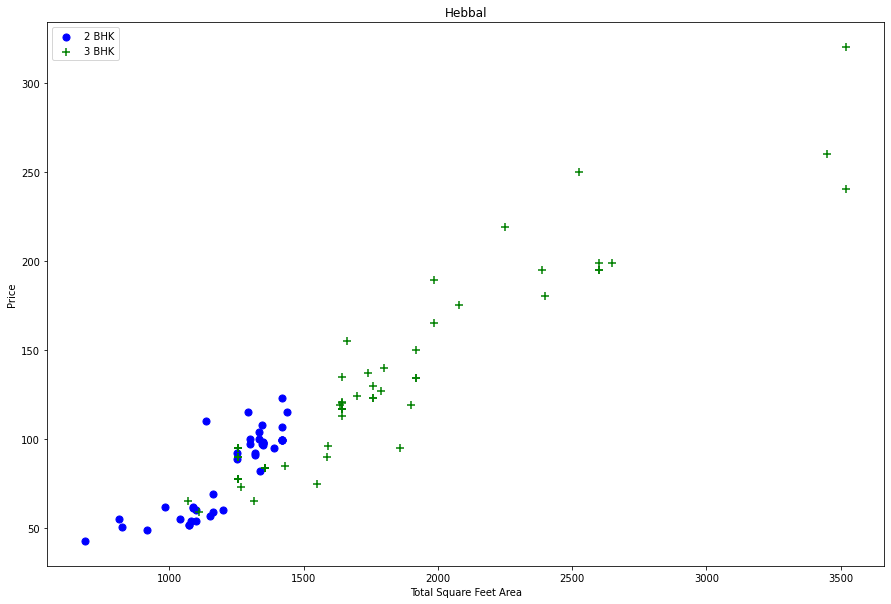

In [85]:
#As we check we remove almost 2k outliers
#Now we check the distribution of data using some visualization
#Lets check for same location same bhk price is same or high and high then how much
#For this we take help of visualization and we may found some outliers

#Drawing scatter plot

def plot_scatter_chart(df,location):
    #Check the location for each 2 and 3bhk bedroom same
    bhk2 = df[(df.location == location) & (df.bhk ==2)] 
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    #plot scatterplot
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()



plot_scatter_chart(DataFrame7, "Hebbal")




In [87]:
#AS blue point 2 bhk and green 3bhk
#As we check 4 datapoint in blue having price higher than 3bhk
#So need to do some data cleaning for those datapoint having same area, same location but bedroom is less but price is more than 3bhk
#we try to remove such datapoints
#We should also remove properties where for same location --> price of 3bhk is less than 2bhk (with same area in sqft)
#To do this we do for given location --> built dictionary of stats per bhk

#We create one function to remove such rows

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
        }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
            
    return df.drop(exclude_indices, axis='index')



DataFrame8 = remove_bhk_outliers(DataFrame7)
DataFrame8.shape








(7329, 7)

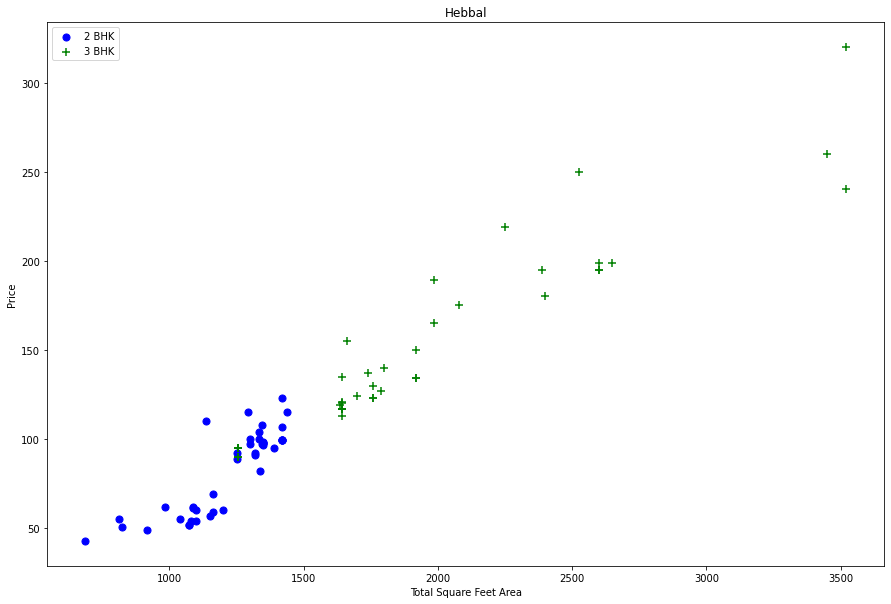

In [88]:
#Now check the above code works or not
plot_scatter_chart(DataFrame8, "Hebbal")

Text(0, 0.5, 'count')

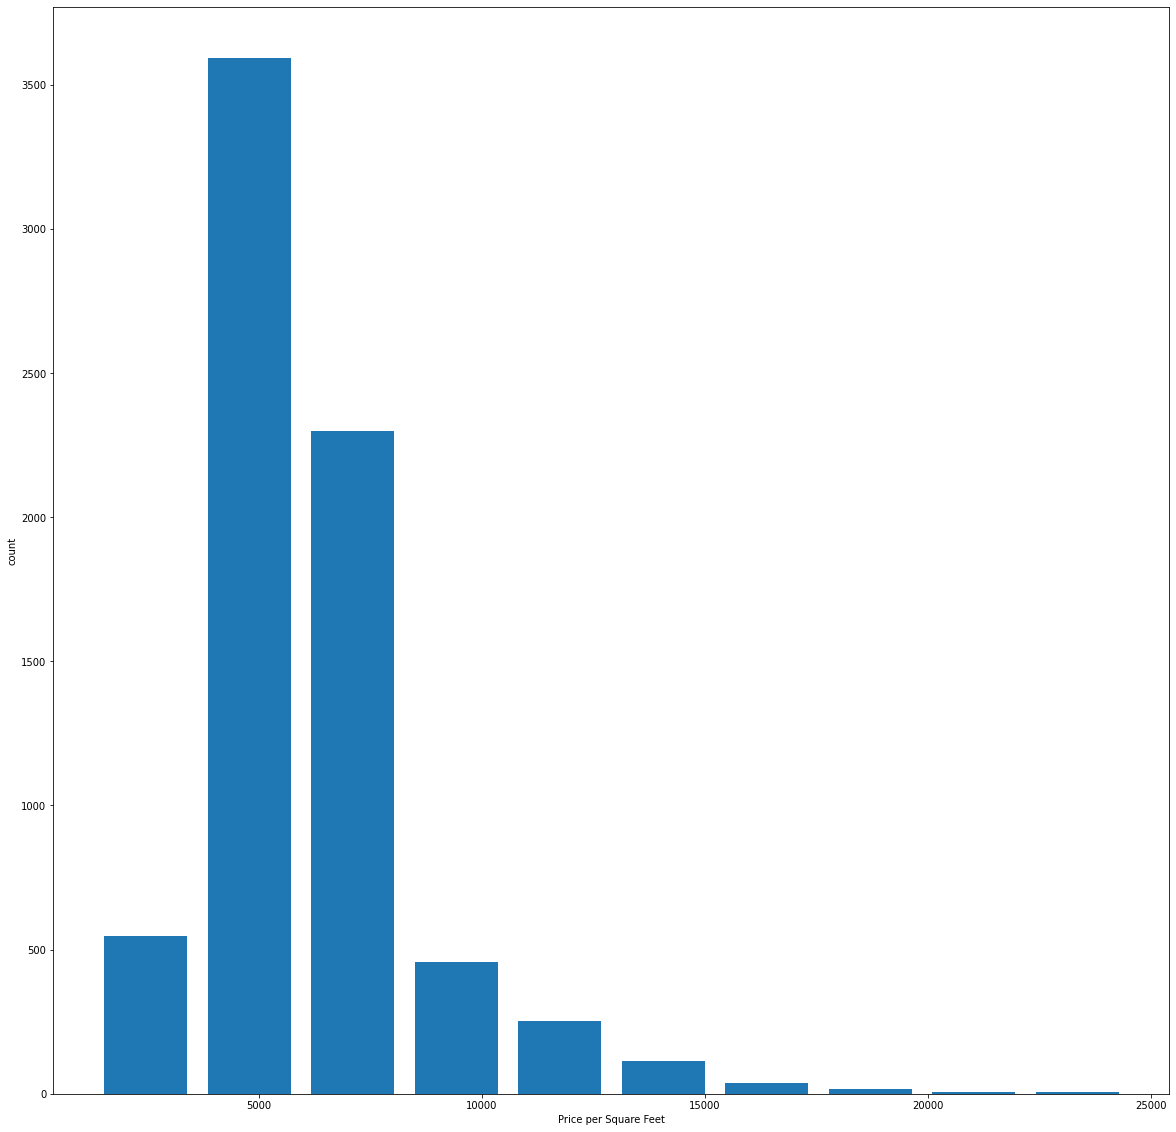

In [89]:
#As we see majority of datapoints has been classified still there are some 
#Green datapoints in 2bhk but no issue for such normalities

#Now again take help of visualization and check the histogram for location
#Check number of properties in particular price range
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)
plt.hist(DataFrame8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("count")



In [90]:
#Now we can see our data is normally distributed.
#AS majority of datapoints in middle and we get bell curve shape in histogram

#Now lets go for other feature bathroom

DataFrame8.bath.unique()




array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [91]:
#As you see we have bathroom range more than expected.. 13 or 10 is not expected
#So need to handle such data
#Lets check number of how many datapoints having more than 10 bathroom

DataFrame8[DataFrame8.bath>10]



,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

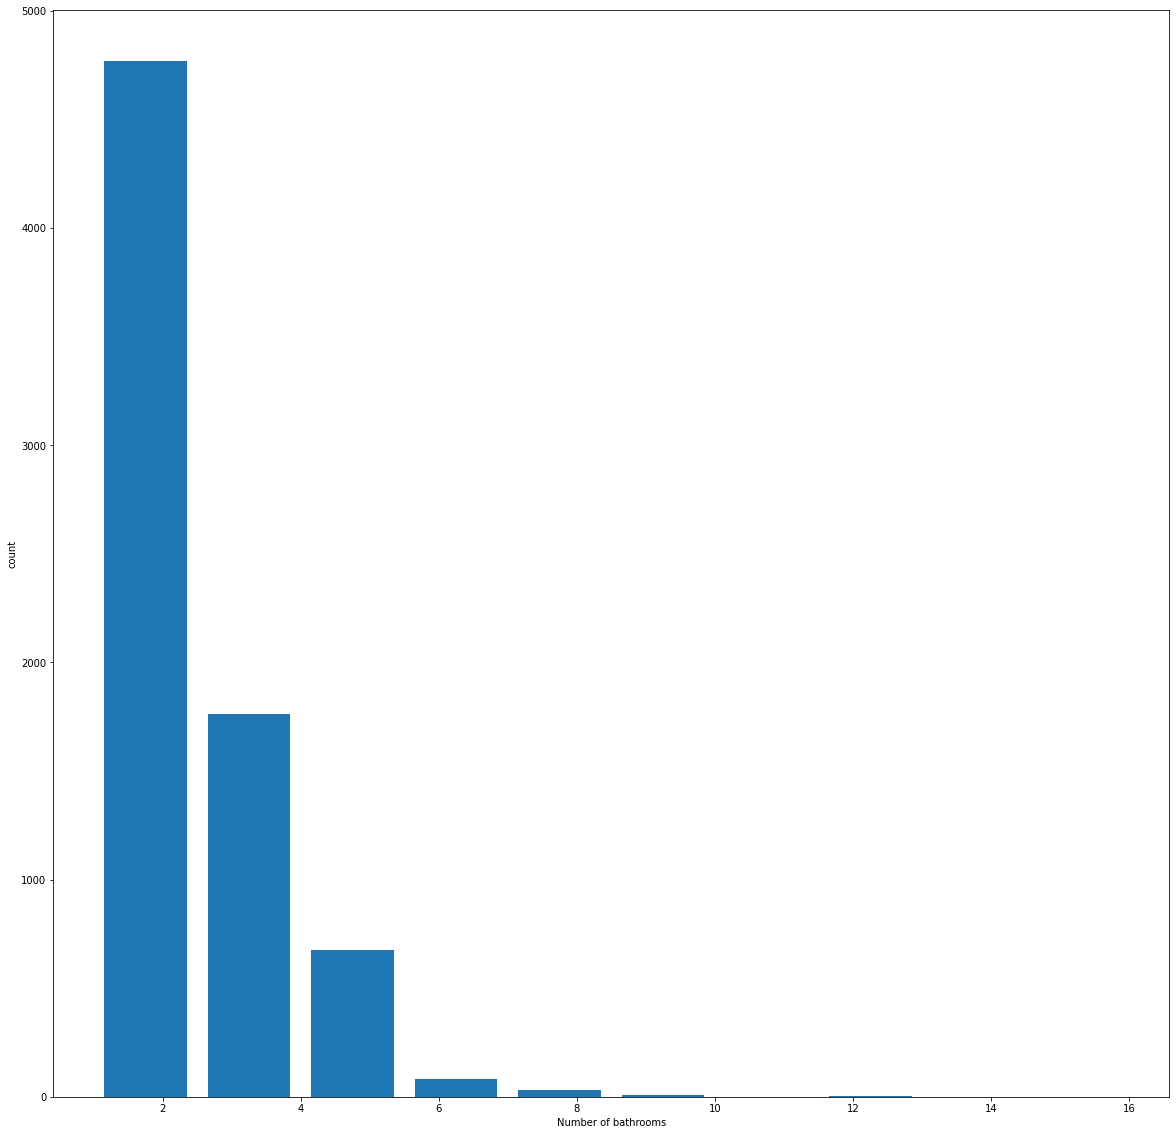

In [92]:
#AS you see there are some house having more than 10k sqft then expected
#But still i cross check this values with business manager and validate such
#Number of bathroom is expected and yes then what is avg sqft of house

#So in discussion we come up with.. if number of bathrooms are more than bedrooms+2 then those are outliers
#So its good to remove such outliers

#Lets plot histogram and check with bathrooms vs bedrooms

plt.hist(DataFrame8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")



In [96]:
#So most of properties have 1-4 bathrooms
#So as discussed with manager, any property have more than 2 bathroom compare to bedroom mark them as outliers

DataFrame8[DataFrame8.bath > DataFrame8.bhk+2]





,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [97]:
#So now i remove those data points from my dataset

DataFrame9 = DataFrame8[DataFrame8.bath < DataFrame8.bhk+2]
DataFrame9.shape

(7251, 7)

In [98]:
#Now almost we have clean data
#One thing left we have to drop now unnecessary features in dataset
#Like price_per_sqft , size is not reuqire

DataFrame10 = DataFrame9.drop(['size','price_per_sqft'],axis = 'columns')
DataFrame10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [99]:
#------------------MACHINE LEARNING IMPLEMENTATION---------------


In [101]:
#As machine learning not accept string variable so we need to handle location categories
# with help of one hot ecoding --> dummies

dummies = pd.get_dummies(DataFrame10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
#So for each location create dummies
#to avoid dummies trape always take one less dummies
DataFrame11 = pd.concat([DataFrame10, dummies.drop('other', axis='columns')],axis='columns')
DataFrame11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#Now drop location col
DataFrame12 = DataFrame11.drop('location', axis='columns')
DataFrame12.head()

<bound method NDFrame.head of        total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0          2850.0   4.0  428.0    4                    1                   0   
1          1630.0   3.0  194.0    3                    1                   0   
2          1875.0   2.0  235.0    3                    1                   0   
3          1200.0   2.0  130.0    3                    1                   0   
4          1235.0   2.0  148.0    2                    1                   0   
...           ...   ...    ...  ...                  ...                 ...   
10232      1200.0   2.0   70.0    2                    0                   0   
10233      1800.0   1.0  200.0    1                    0                   0   
10236      1353.0   2.0  110.0    2                    0                   0   
10237       812.0   1.0   26.0    1                    0                   0   
10240      3600.0   5.0  400.0    4                    0                   0   

       2n

In [105]:
DataFrame12.shape

(7251, 245)

In [106]:
#------now divide dataframe as dependedn and independent features---

X = DataFrame12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
y = DataFrame12['price']

In [108]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [111]:
#pip install sklearn

In [113]:
#Now divide dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 10)




In [115]:
#As we see out data is normally distributed so we can use linear regression model

from sklearn.linear_model import LinearRegression
Lr_model = LinearRegression()
Lr_model.fit(X_train, y_train)
Lr_model.score(X_test,y_test)





0.8452277697874251

In [119]:
#Now we use another algo.. k-flod cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

Cross_Val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv = Cross_Val)




array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [120]:
#AS i get majority of time i am getting more than 80 for linear regression

In [130]:
#So we try other regression method to check the accuracy
#Lets check gridserach cV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion' :['mse','friedman_mse'],
                'splitter':['best','random']
            
            }
        }
                
    }
    
    #Now we do hyper parameter tunning

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV (config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

    


In [132]:
find_best_model_using_gridsearchcv(X,y)



,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.716865,"{'criterion': 'mse', 'splitter': 'best'}"


In [134]:
#Found that linear regression giving good output

#Now creat function to predict price for particular location 

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return Lr_model.predict([x])[0]




In [141]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677155739

In [140]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

81.72616900730834

In [139]:
predict_price('Indira Nagar', 1000, 2, 2)

181.27815484007238

In [142]:
#Export model to pickle file
#In real life use ab testing

import pickle
with open('Banglore_House_Price_Prediction_Model.pickle','wb') as f:
    pickle.dump(Lr_model,f)


In [143]:
#File size is less becoz not take data
#Need which column we use so need col. information

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))